In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim


In [2]:
import pandas as pd
iris = pd.read_csv('/kaggle/input/iris/Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
features = iris.iloc[:,1:5]
features = features.to_numpy()

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features = scaler.fit_transform(features)

In [6]:
import torch.nn.functional as F
labels = iris.iloc[:,5]
labels.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [7]:
# USe pd.factorize to convert categorical into integer
labels,_ = pd.factorize(labels)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [10]:
#Convert to tensors for target
target = F.one_hot(torch.tensor(labels),num_classes=3)

In [11]:
#convert to tensors for featrues
inputs = torch.tensor(features)


In [12]:
inputs.size()

torch.Size([150, 4])

In [13]:
n_features =4
n_output=1

Create a simple NN with three layers

In [15]:
model = nn.Sequential(
        nn.Linear(n_features,100),
        nn.LeakyReLU(),
        nn.Linear(100,50),
        nn.LeakyReLU(),
        nn.Linear(50,3))

In [16]:
# Dry run forward pass
model(inputs[0].float())

tensor([ 0.0780, -0.0532, -0.3137], grad_fn=<ViewBackward0>)

Dataset and Data loader creation with split

In [17]:
#Dataset and dataloader creation
from torch.utils.data import TensorDataset 
from torch.utils.data import DataLoader
from torch.utils.data import random_split

In [18]:
dataset = TensorDataset(inputs.float(),target.float())

In [21]:
total_size = len(dataset)
train_size = int(0.8*total_size)
valid_size = int(0.15*total_size)
test_size = total_size-train_size-valid_size
print(total_size,train_size,valid_size,test_size)

150 120 22 8


In [22]:
train_dataset,valid_dataset,test_dataset = random_split(dataset,[train_size,valid_size,test_size])

In [24]:
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
val_loader = DataLoader(valid_dataset, batch_size=2, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=False)

# Optimizer

In [25]:
#Defining optimizer
optimizer = optim.SGD(model.parameters(),lr=1e-3,momentum=0.95)

In [26]:
#define Loss
from torch.nn import CrossEntropyLoss as CEL
criterion = CEL()

In [27]:
num_epochs = 50

# Training Loop

In [28]:
# Initialize list to store mean loss for each epoch
epoch_losses = []

# Set the model to training mode
model.train()

# Training Loop
for epoch in range(num_epochs):
    # Initialize the variable to accumulate loss for this epoch
    total_loss = 0.0
    num_batches = 0

    # Loop over the batches
    for batch in train_loader:
        optimizer.zero_grad()  # Clear the gradients

        # Unpack features and labels from the batch
        features, labels = batch

        # Forward pass: Get model predictions
        preds = model(features)

        # Calculate loss using the criterion
        loss = criterion(preds, labels.argmax(dim=-1))

        # Backward pass: Compute gradients
        loss.backward()

        # Update model weights
        optimizer.step()

        # Accumulate loss for this batch
        total_loss += loss.item()  # Convert loss tensor to a scalar using .item()

        # Count the number of batches processed
        num_batches += 1

    # Calculate the mean loss for this epoch
    mean_loss = total_loss / num_batches

    # Store the mean loss for this epoch
    epoch_losses.append(mean_loss)

    # Print the mean loss for this epoch
    print(f"Epoch {epoch+1}/{num_epochs}, Mean Loss: {mean_loss:.4f}")


Epoch 1/50, Mean Loss: 0.9526
Epoch 2/50, Mean Loss: 0.5835
Epoch 3/50, Mean Loss: 0.4057
Epoch 4/50, Mean Loss: 0.3281
Epoch 5/50, Mean Loss: 0.2830
Epoch 6/50, Mean Loss: 0.2422
Epoch 7/50, Mean Loss: 0.2170
Epoch 8/50, Mean Loss: 0.1878
Epoch 9/50, Mean Loss: 0.1719
Epoch 10/50, Mean Loss: 0.1411
Epoch 11/50, Mean Loss: 0.1389
Epoch 12/50, Mean Loss: 0.1170
Epoch 13/50, Mean Loss: 0.1091
Epoch 14/50, Mean Loss: 0.0998
Epoch 15/50, Mean Loss: 0.0870
Epoch 16/50, Mean Loss: 0.0829
Epoch 17/50, Mean Loss: 0.0823
Epoch 18/50, Mean Loss: 0.0879
Epoch 19/50, Mean Loss: 0.0774
Epoch 20/50, Mean Loss: 0.0727
Epoch 21/50, Mean Loss: 0.0784
Epoch 22/50, Mean Loss: 0.0685
Epoch 23/50, Mean Loss: 0.0768
Epoch 24/50, Mean Loss: 0.0665
Epoch 25/50, Mean Loss: 0.0708
Epoch 26/50, Mean Loss: 0.0627
Epoch 27/50, Mean Loss: 0.0771
Epoch 28/50, Mean Loss: 0.0705
Epoch 29/50, Mean Loss: 0.0908
Epoch 30/50, Mean Loss: 0.0639
Epoch 31/50, Mean Loss: 0.0610
Epoch 32/50, Mean Loss: 0.0525
Epoch 33/50, Mean

# Evaluate

In [29]:
import torchmetrics
metric = torchmetrics.Accuracy(task='multiclass',num_classes=3)

In [33]:
train_dataset[0]

(tensor([-1.0218, -0.1250, -1.2275, -1.3130]), tensor([1., 0., 0.]))

In [35]:
inputs[0]

tensor([-0.9007,  1.0321, -1.3413, -1.3130], dtype=torch.float64)

In [46]:
model.eval()
all_preds = []
all_targets = []
for i in range(len(train_dataset)):
    inputs,targets = train_dataset[i]
    predicts = model(inputs.float())
           # Get predicted labels and true labels (assuming one-hot encoded targets)
    all_preds.append(predicts.argmax(dim=-1))
    all_targets.append(targets.argmax(dim=-1))
    

In [51]:
import torch
import torchmetrics

def calculate_accuracy(model, dataloader, device='cpu'):
    """
    Calculate accuracy of the model given a dataloader.
    
    Args:
        model: The model to evaluate.
        dataloader: DataLoader providing the data.
        device: Device to perform evaluation ('cpu' or 'cuda').
        
    Returns:
        accuracy: The accuracy of the model on the dataset provided by dataloader.
    """
    
    # Initialize the accuracy metric
    accuracy_metric = torchmetrics.Accuracy(task='multiclass',num_classes=3)
    # Set the model to evaluation mode
    model.eval()
    
    # List to store all predictions and targets
    all_preds = []
    all_targets = []
    
    with torch.no_grad():  # Disable gradient computation
        for inputs, targets in dataloader:
            # Move inputs and targets to the specified device
            inputs, targets = inputs.to(device), targets.to(device)
            
            # Forward pass to get predictions
            outputs = model(inputs)
            
            # Get the predicted labels and actual labels (assuming one-hot encoded targets)
            preds = outputs.argmax(dim=-1)
            true_labels = targets.argmax(dim=-1)
            
            # Accumulate the predictions and targets
            all_preds.append(preds)
            all_targets.append(true_labels)
    
    # Concatenate all predictions and targets
    all_preds = torch.cat(all_preds)
    all_targets = torch.cat(all_targets)
    
    # Calculate accuracy
    accuracy = accuracy_metric(all_preds, all_targets)
    
    return accuracy.item()


In [53]:
# Assuming you have a model and a dataloader (e.g., train_loader, val_loader)
accuracy = calculate_accuracy(model, train_loader)
print(f'Train Accuracy: {accuracy:.4f}')


Train Accuracy: 0.9833


In [55]:
# Assuming you have a model and a dataloader (e.g., train_loader, val_loader)
accuracy = calculate_accuracy(model, val_loader)
print(f'Validation Accuracy: {accuracy:.4f}')


Validation Accuracy: 1.0000


In [56]:
# Assuming you have a model and a dataloader (e.g., train_loader, val_loader)
accuracy = calculate_accuracy(model, test_loader)
print(f'test Accuracy: {accuracy:.4f}')


test Accuracy: 1.0000


# Using Random Search and Grid Search

In [61]:
def train(model,loader,lr,momentum,num_epochs=10):
    epoch_losses = []
    optimizer = optim.SGD(model.parameters(),lr = lr,momentum=momentum)
    criterion = CEL()
    
    model.train()
    total_loss=0.0
    for epoch in range(num_epochs):
        for batch in loader: 
            optimizer.zero_grad()
            inputs,targets = batch
            outputs = model(inputs)
            loss = criterion(outputs,targets)
            #backprop
            loss.backward()
            #update
            optimizer.step()
            total_loss +=loss.item()
        epoch_losses.append(total_loss/len(train_loader))
            # Print the mean loss for this epoch
        print(f"Epoch {epoch+1}/{num_epochs}, Mean Loss: {mean_loss:.4f}")
    return epoch_losses[-1]

In [62]:
train(model,train_loader,0.001,0.99,num_epochs=10)

Epoch 1/10, Mean Loss: 0.0521
Epoch 2/10, Mean Loss: 0.0521
Epoch 3/10, Mean Loss: 0.0521
Epoch 4/10, Mean Loss: 0.0521
Epoch 5/10, Mean Loss: 0.0521
Epoch 6/10, Mean Loss: 0.0521
Epoch 7/10, Mean Loss: 0.0521
Epoch 8/10, Mean Loss: 0.0521
Epoch 9/10, Mean Loss: 0.0521
Epoch 10/10, Mean Loss: 0.0521


0.39871410641579436

In [67]:
import random
def random_search(model, train_loader, param_ranges, n_trials=10):
    results = []
    for i in range(n_trials):
        lr = random.uniform(*param_ranges['lr'])
        momentum = random.uniform(*param_ranges['momentum'])
        
        loss = train(model, train_loader, lr, momentum)
        results.append({'lr': lr, 'momentum': momentum, 'loss': loss})
    
    return results

In [68]:
param_ranges = {
    'lr': [0.00001, 0.01],        # Learning rate range
    'momentum': [0.75, 0.99]     # Momentum range
}
# Perform random search and grid search
random_search_results = random_search(model, train_loader, param_ranges, n_trials=20)


Epoch 1/10, Mean Loss: 0.0521
Epoch 2/10, Mean Loss: 0.0521
Epoch 3/10, Mean Loss: 0.0521
Epoch 4/10, Mean Loss: 0.0521
Epoch 5/10, Mean Loss: 0.0521
Epoch 6/10, Mean Loss: 0.0521
Epoch 7/10, Mean Loss: 0.0521
Epoch 8/10, Mean Loss: 0.0521
Epoch 9/10, Mean Loss: 0.0521
Epoch 10/10, Mean Loss: 0.0521
Epoch 1/10, Mean Loss: 0.0521
Epoch 2/10, Mean Loss: 0.0521
Epoch 3/10, Mean Loss: 0.0521
Epoch 4/10, Mean Loss: 0.0521
Epoch 5/10, Mean Loss: 0.0521
Epoch 6/10, Mean Loss: 0.0521
Epoch 7/10, Mean Loss: 0.0521
Epoch 8/10, Mean Loss: 0.0521
Epoch 9/10, Mean Loss: 0.0521
Epoch 10/10, Mean Loss: 0.0521
Epoch 1/10, Mean Loss: 0.0521
Epoch 2/10, Mean Loss: 0.0521
Epoch 3/10, Mean Loss: 0.0521
Epoch 4/10, Mean Loss: 0.0521
Epoch 5/10, Mean Loss: 0.0521
Epoch 6/10, Mean Loss: 0.0521
Epoch 7/10, Mean Loss: 0.0521
Epoch 8/10, Mean Loss: 0.0521
Epoch 9/10, Mean Loss: 0.0521
Epoch 10/10, Mean Loss: 0.0521
Epoch 1/10, Mean Loss: 0.0521
Epoch 2/10, Mean Loss: 0.0521
Epoch 3/10, Mean Loss: 0.0521
Epoch 4

In [74]:
# Hyperparameter grid for grid search
param_grid = {
    'lr': [0.001, 0.01, 0.1],   # Learning rates to try
    'momentum': [0.7, 0.8, 0.9] # Momentum values to try
}
def grid_search(model, train_loader, param_grid):
    results = []
    for lr in param_grid['lr']:
        for momentum in param_grid['momentum']:
            loss = train(model, train_loader, lr, momentum)
            results.append({'lr': lr, 'momentum': momentum, 'loss': loss})
    
    return results

In [75]:
grid_search_results = grid_search(model, train_loader, param_grid)

Epoch 1/10, Mean Loss: 0.0521
Epoch 2/10, Mean Loss: 0.0521
Epoch 3/10, Mean Loss: 0.0521
Epoch 4/10, Mean Loss: 0.0521
Epoch 5/10, Mean Loss: 0.0521
Epoch 6/10, Mean Loss: 0.0521
Epoch 7/10, Mean Loss: 0.0521
Epoch 8/10, Mean Loss: 0.0521
Epoch 9/10, Mean Loss: 0.0521
Epoch 10/10, Mean Loss: 0.0521
Epoch 1/10, Mean Loss: 0.0521
Epoch 2/10, Mean Loss: 0.0521
Epoch 3/10, Mean Loss: 0.0521
Epoch 4/10, Mean Loss: 0.0521
Epoch 5/10, Mean Loss: 0.0521
Epoch 6/10, Mean Loss: 0.0521
Epoch 7/10, Mean Loss: 0.0521
Epoch 8/10, Mean Loss: 0.0521
Epoch 9/10, Mean Loss: 0.0521
Epoch 10/10, Mean Loss: 0.0521
Epoch 1/10, Mean Loss: 0.0521
Epoch 2/10, Mean Loss: 0.0521
Epoch 3/10, Mean Loss: 0.0521
Epoch 4/10, Mean Loss: 0.0521
Epoch 5/10, Mean Loss: 0.0521
Epoch 6/10, Mean Loss: 0.0521
Epoch 7/10, Mean Loss: 0.0521
Epoch 8/10, Mean Loss: 0.0521
Epoch 9/10, Mean Loss: 0.0521
Epoch 10/10, Mean Loss: 0.0521
Epoch 1/10, Mean Loss: 0.0521
Epoch 2/10, Mean Loss: 0.0521
Epoch 3/10, Mean Loss: 0.0521
Epoch 4

In [70]:
# Extract losses and corresponding hyperparameters
import random
import matplotlib.pyplot as plt
import numpy as np
def plot_results(results, title):
    lrs = [res['lr'] for res in results]
    momenta = [res['momentum'] for res in results]
    losses = [res['loss'] for res in results]

    fig, ax = plt.subplots()
    sc = ax.scatter(lrs, momenta, c=losses, cmap='viridis', s=100)
    plt.colorbar(sc, label="Loss")
    ax.set_xlabel("Learning Rate")
    ax.set_ylabel("Momentum")
    ax.set_title(title)
    plt.show()


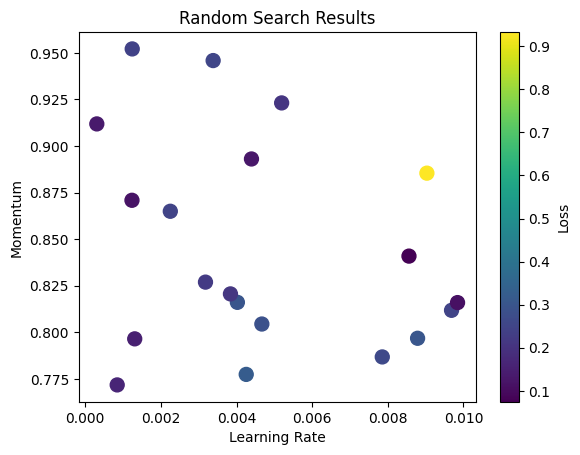

In [71]:
plot_results(random_search_results, "Random Search Results")

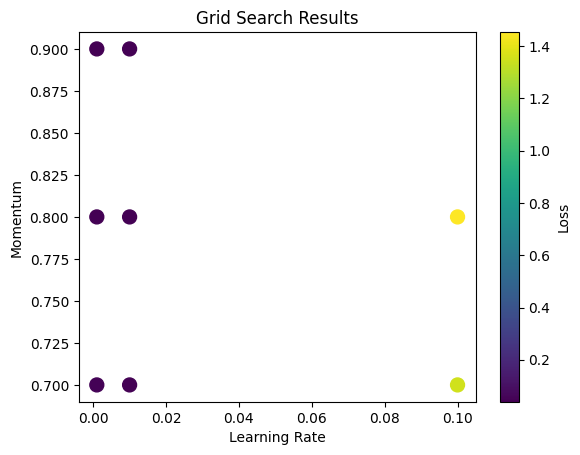

In [76]:
plot_results(grid_search_results, "Grid Search Results")